In [1]:
import yaml
import cv2
import os
import numpy as np
import pandas as pd
import zipfile
import requests
from collections import Counter

from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **YOLOv8 NANO**

In [21]:
model = YOLO("yolov8n.pt") 

model.train(
    data=Path,
    epochs=10,
    imgsz=640,
    batch=32
)

# model.save('YOLOv8n_10Epochs_640imgsz_32batch.pt')

Ultralytics 8.3.96  Python-3.9.20 torch-2.6.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\jorge\Documents\CV\CSWK\african-wildlife.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|███████████████████████████████████████████████████████████████████████████████| 100M/100M [00:11<00:00, 9.16MB/s]
Unzipping C:\Users\jorge\Documents\CV\CSWK\datasets\african-wildlife.zip to C:\Users\jorge\Documents\CV\CSWK\datasets\a

Dataset download success  (19.0s), saved to C:\Users\jorge\Documents\CV\CSWK\datasets



100%|███████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 6.36MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Users\jorge\Documents\CV\CSWK\datasets\african-wildlife\train\labels... 1052 images, 0 backgrounds, 


train: New cache created: C:\Users\jorge\Documents\CV\CSWK\datasets\african-wildlife\train\labels.cache


val: Scanning C:\Users\jorge\Documents\CV\CSWK\datasets\african-wildlife\valid\labels... 225 images, 0 backgrounds, 0 c


val: New cache created: C:\Users\jorge\Documents\CV\CSWK\datasets\african-wildlife\valid\labels.cache
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7718      2.635      1.197         48        640: 100%|██████████| 33/33 [07:38<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<0

                   all        225        379      0.981     0.0795      0.562      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.8992      1.825      1.271         39        640: 100%|██████████| 33/33 [07:34<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<0

                   all        225        379      0.743      0.572      0.693      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.8908      1.618      1.255         51        640: 100%|██████████| 33/33 [07:55<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<0

                   all        225        379      0.759      0.619      0.694      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.8959      1.491      1.262         53        640: 100%|██████████| 33/33 [08:03<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:31<0

                   all        225        379      0.556      0.568      0.556      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      0.867      1.323      1.218         43        640: 100%|██████████| 33/33 [07:52<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<0

                   all        225        379      0.784      0.612       0.74      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.7975      1.186      1.171         51        640: 100%|██████████| 33/33 [07:20<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<0

                   all        225        379       0.78       0.67      0.757      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.7475      1.024      1.138         46        640: 100%|██████████| 33/33 [07:59<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<0

                   all        225        379      0.824      0.725      0.821      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.6993     0.9359      1.106         53        640: 100%|██████████| 33/33 [07:57<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:30<0

                   all        225        379      0.913      0.823      0.903      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.6717     0.8389      1.089         65        640: 100%|██████████| 33/33 [07:46<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:29<0

                   all        225        379      0.928      0.834      0.912      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.6288     0.7681      1.043         48        640: 100%|██████████| 33/33 [07:20<00:00, 13.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<0

                   all        225        379      0.948      0.861      0.935      0.757



10 epochs completed in 1.378 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.96  Python-3.9.20 torch-2.6.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<0


                   all        225        379      0.949       0.86      0.935      0.757
               buffalo         62         89      0.962      0.831      0.922      0.745
              elephant         53         91      0.907      0.863       0.92      0.733
                 rhino         55         85      0.949      0.871      0.945      0.791
                 zebra         59        114      0.976      0.877      0.952      0.759
Speed: 2.4ms preprocess, 88.3ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs\detect\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000252C6581F70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

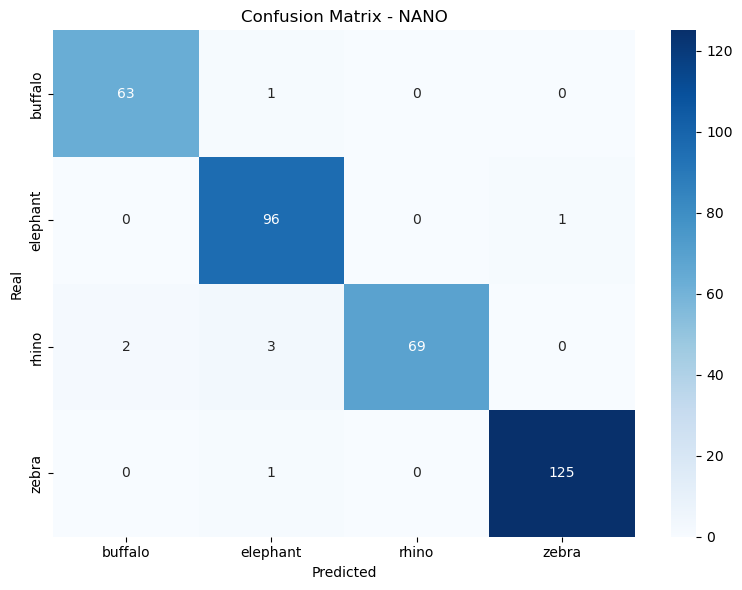

In [66]:
model = YOLO("C:\\Users\\jorge\\Documents\\CV\\CSWK\\YOLOv8n_10Epochs_640imgsz_32batch.pt")  

img_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\test\\images"  # Test images directory
label_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\test\\labels"  # Test labels directory

class_names = ["buffalo", "elephant", "rhino", "zebra"]  # Class labels

true_classes_nano = []  
pred_classes_nano = []  

for filename in os.listdir(img_dir):  
    if not filename.endswith(".jpg"):  
        continue

    name = os.path.splitext(filename)[0]  # Gets image filename without extension
    img_path = os.path.join(img_dir, filename)  # Full path to the image
    label_path = os.path.join(label_dir, f"{name}.txt")  # Full path to the corresponding label file

    if not os.path.exists(label_path):  # Skips if label file doesn't exist
        continue
    with open(label_path, "r") as f:
        lines = f.readlines()
        labels = [int(line.strip().split()[0]) for line in lines]  # Extracts class IDs from label file

    # Makes predictions with the model
    results = model.predict(source=img_path, conf=0.25, iou=0.5, verbose=False)[0] 

    preds = results.boxes.cls.cpu().numpy().astype(int) if results.boxes.cls.numel() > 0 else []  # Gets predicted class IDs

    # Match number of predictions with number of ground truth labels
    min_len = min(len(labels), len(preds))  # To handle mismatch in number of objects
    true_classes_nano.extend(labels[:min_len])  # Add true labels up to min length
    pred_classes_nano.extend(preds[:min_len])  # Add predicted labels up to min length

# Create confusion matrix
cm = confusion_matrix(true_classes_nano, pred_classes_nano, labels=list(range(len(class_names))))  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues") 
plt.xlabel("Predicted")  
plt.ylabel("Real") 
plt.title("Confusion Matrix - NANO") 
plt.tight_layout()
plt.show()


In [76]:
report = classification_report(
    true_classes_nano,  # Ground truth classes
    pred_classes_nano,  # Predicted classes
    target_names=class_names,  # Class names for the report
    output_dict=True  # Return results as a dictionary (for easy conversion to DataFrame)
)

df_nano = pd.DataFrame(report).transpose()  # Transpose to have classes as rows

df_nano = df_nano.loc[class_names, ["precision", "recall", "f1-score"]]
df_nano = df_nano.round(3)

# Calculates mean metrics across all classes
Precision_mean = df_nano["precision"].mean() 
Recall_mean = df_nano["recall"].mean()  
F1_Score_mean = df_nano["f1-score"].mean()  

# Add a row for the mean values
df_nano.loc["Mean Value"] = [Precision_mean, Recall_mean, F1_Score_mean]

print("\n=== Metrics NANO YOLO ===\n")
print(df_nano)


=== Metrics NANO YOLO ===

            precision  recall  f1-score
buffalo       0.96900  0.9840     0.977
elephant      0.95000  0.9900     0.970
rhino         1.00000  0.9320     0.965
zebra         0.99200  0.9920     0.992
Mean Value    0.97775  0.9745     0.976


## **YOLOv8 SMALL**

In [5]:
model = YOLO("yolov8s.pt")

model.train(
    data = Path,
    epochs = 10,
    batch = 16,
    imgsz = 640,
)

# model.save('YOLOv8s_10Epochs_640imgsz_16batch.pt')

New https://pypi.org/project/ultralytics/8.3.99 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.96  Python-3.9.20 torch-2.6.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\jorge\Documents\CV\CSWK\african-wildlife.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

train: Scanning C:\Users\jorge\Documents\CV\CSWK\datasets\african-wildlife\train\labels.cache... 1052 images, 0 backgro
val: Scanning C:\Users\jorge\Documents\CV\CSWK\datasets\african-wildlife\valid\labels.cache... 225 images, 0 background


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train6
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.8033      2.008      1.223         22        640: 100%|██████████| 66/66 [17:13<00:00, 15.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:58<0

                   all        225        379      0.762      0.699      0.798      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9561      1.262      1.317         16        640: 100%|██████████| 66/66 [42:43<00:00, 38.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:59<0

                   all        225        379      0.554       0.46      0.494      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.005      1.207      1.352         27        640: 100%|██████████| 66/66 [18:24<00:00, 16.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:04<0

                   all        225        379      0.655      0.601      0.641       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.016      1.199      1.382         27        640: 100%|██████████| 66/66 [15:24<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:49<0

                   all        225        379       0.68       0.58      0.647      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9309     0.9961      1.296         16        640: 100%|██████████| 66/66 [57:12<00:00, 52.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:44<0

                   all        225        379      0.767      0.652      0.737      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.8709     0.9051      1.248         25        640: 100%|██████████| 66/66 [13:51<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:48<0

                   all        225        379      0.865      0.744      0.846      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.8007     0.7975      1.191         18        640: 100%|██████████| 66/66 [14:02<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:46<0

                   all        225        379      0.898      0.777       0.89      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      0.744     0.7307      1.153         22        640: 100%|██████████| 66/66 [13:50<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:46<0

                   all        225        379      0.912      0.849      0.925      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.6912     0.6197      1.123         38        640: 100%|██████████| 66/66 [13:34<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:48<0

                   all        225        379      0.933      0.828      0.922      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.6389      0.548      1.065         20        640: 100%|██████████| 66/66 [13:32<00:00, 12.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:45<0

                   all        225        379      0.922      0.871      0.935      0.757



10 epochs completed in 3.811 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 22.5MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics 8.3.96  Python-3.9.20 torch-2.6.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:41<0


                   all        225        379      0.922      0.871      0.935      0.757
               buffalo         62         89      0.961      0.865      0.934      0.787
              elephant         53         91      0.847      0.879      0.922      0.717
                 rhino         55         85      0.939      0.909      0.954      0.803
                 zebra         59        114      0.941      0.832      0.928      0.719
Speed: 2.5ms preprocess, 170.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000224CDBC2730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

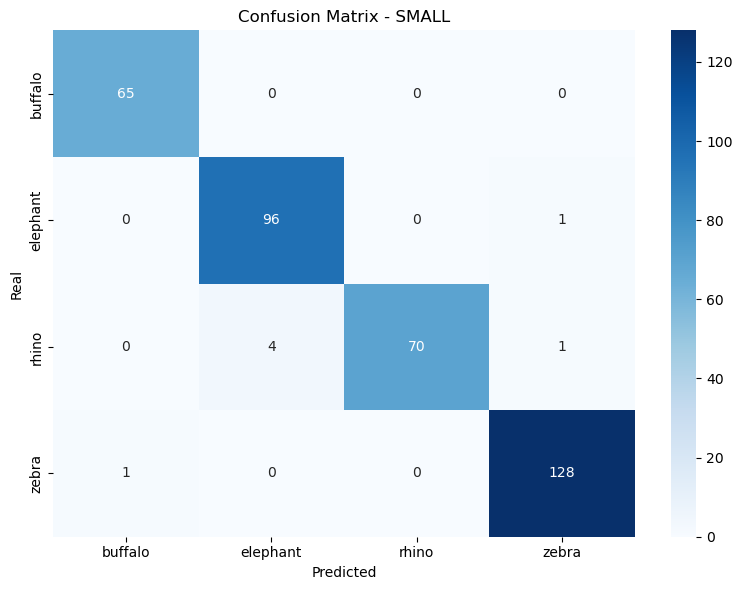

In [74]:
model = YOLO("C:\\Users\\jorge\\Documents\\CV\\CSWK\\YOLOv8s_10Epochs_640imgsz_16batch.pt")  

img_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\test\\images"
label_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\test\\labels"

class_names = ["buffalo", "elephant", "rhino", "zebra"]

true_classes_small = []
pred_classes_small = []

for filename in os.listdir(img_dir):
    if not filename.endswith(".jpg"):
        continue

    name = os.path.splitext(filename)[0]               
    img_path = os.path.join(img_dir, filename)         
    label_path = os.path.join(label_dir, f"{name}.txt") 

    if not os.path.exists(label_path):  
        continue
    with open(label_path, "r") as f:
        lines = f.readlines()
        labels = [int(line.strip().split()[0]) for line in lines]

    results = model.predict(source=img_path, conf=0.25, iou=0.5, verbose=False)[0]

    preds = results.boxes.cls.cpu().numpy().astype(int) if results.boxes.cls.numel() > 0 else []

    min_len = min(len(labels), len(preds))
    true_classes_small.extend(labels[:min_len])
    pred_classes_small.extend(preds[:min_len])

cm = confusion_matrix(true_classes_small, pred_classes_small, labels=list(range(len(class_names))))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix - SMALL")
plt.tight_layout()
plt.show()

In [71]:
report = classification_report(true_classes_small, pred_classes_small, target_names=class_names, output_dict=True)

df_small = pd.DataFrame(report).transpose()
df_small = df_small.loc[class_names, ["precision", "recall", "f1-score"]]
df_small = df_small.round(3)

Precision_mean = df_small["precision"].mean()
Recall_mean = df_small["recall"].mean()
F1_Score_mean = df_small["f1-score"].mean()

df_small.loc["Mean Value"] = [Precision_mean, Recall_mean, F1_Score_mean]

print("\n=== Metrics SMALL YOLO ===\n")
print(df_small)


=== Metrics SMALL YOLO ===

            precision   recall  f1-score
buffalo        0.9850  1.00000   0.99200
elephant       0.9600  0.99000   0.97500
rhino          1.0000  0.93300   0.96600
zebra          0.9850  0.99200   0.98800
Mean Value     0.9825  0.97875   0.98025


## **YOLO Small Augmented Images**

In [41]:
model = YOLO("yolov8s.pt")

Path = Path = 'C:\\Users\\jorge\\Documents\\CV\\CSWK\\african-wildlife.yaml'

model.train(
    data = Path,
    epochs = 10,
    batch = 16,
    imgsz = 640,
)

100%|█████████████████████████████████████████████████████████████████████████████| 21.5M/21.5M [00:02<00:00, 11.0MB/s]


New https://pypi.org/project/ultralytics/8.3.103 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.96  Python-3.9.20 torch-2.6.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\jorge\Documents\CV\CSWK\african-wildlife.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

train: Scanning C:\Users\jorge\Documents\CV\CSWK\african-wildlife\train\labels... 4208 images, 0 backgrounds, 0 corrupt


train: New cache created: C:\Users\jorge\Documents\CV\CSWK\african-wildlife\train\labels.cache


val: Scanning C:\Users\jorge\Documents\CV\CSWK\african-wildlife\valid\labels... 225 images, 0 backgrounds, 0 corrupt: 1

val: New cache created: C:\Users\jorge\Documents\CV\CSWK\african-wildlife\valid\labels.cache
Plotting labels to runs\detect\train7\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train7
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7789       1.37      1.178         23        640: 100%|██████████| 263/263 [21:42:42<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:50<0

                   all        225        379      0.817      0.647      0.786      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9168     0.9937      1.271         37        640: 100%|██████████| 263/263 [57:37<00:00, 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:49<0

                   all        225        379      0.732      0.583      0.663      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9186     0.9404      1.262         23        640: 100%|██████████| 263/263 [12:33:50<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/

                   all        225        379       0.79      0.722      0.821      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.8565     0.8253      1.219         23        640: 100%|██████████| 263/263 [53:3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/

                   all        225        379      0.825      0.765      0.852      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.7748     0.6969      1.158         38        640: 100%|██████████| 263/263 [53:1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/

                   all        225        379      0.917      0.778      0.897      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.7041     0.5998      1.106         37        640: 100%|██████████| 263/263 [52:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/

                   all        225        379      0.898      0.801       0.89      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.6343     0.5146      1.049         33        640: 100%|██████████| 263/263 [53:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/

                   all        225        379      0.951      0.851       0.94      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.5815     0.4423      1.016         25        640: 100%|██████████| 263/263 [53:3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/

                   all        225        379      0.927       0.89      0.937      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G       0.53     0.3794     0.9746         27        640: 100%|██████████| 263/263 [53:1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/

                   all        225        379      0.926      0.881      0.931       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.4781     0.3373     0.9467         32        640: 100%|██████████| 263/263 [53:2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/

                   all        225        379      0.938      0.892      0.942      0.801



10 epochs completed in 41.588 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 22.5MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics 8.3.96  Python-3.9.20 torch-2.6.0+cpu CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/


                   all        225        379      0.938      0.892      0.942      0.801
               buffalo         62         89      0.988      0.908      0.956      0.825
              elephant         53         91       0.87      0.846        0.9      0.754
                 rhino         55         85      0.932      0.929      0.974      0.857
                 zebra         59        114      0.962      0.886       0.94      0.768
Speed: 2.3ms preprocess, 166.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000252802457C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [43]:
model.save('YOLOv8s_10Epochs_640imgsz_16batch_augmented.pt')

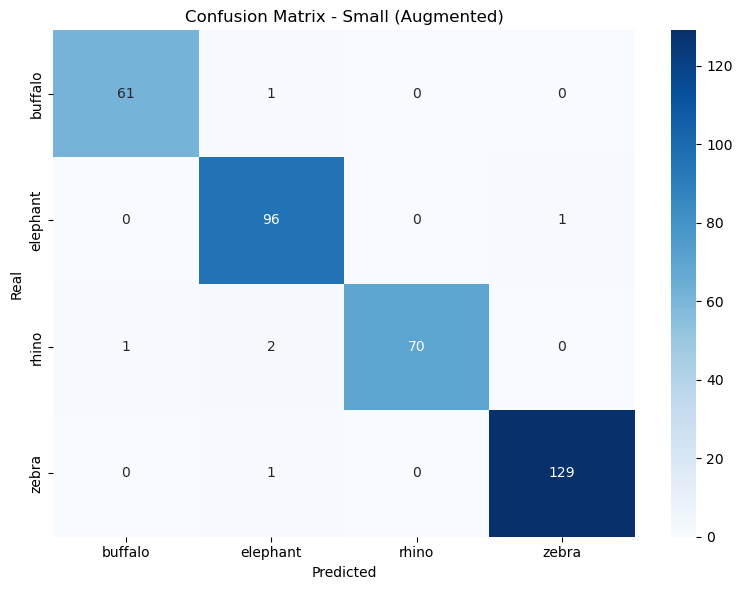

In [49]:
model = YOLO("C:\\Users\\jorge\\Documents\\CV\\CSWK\\YOLOv8s_10Epochs_640imgsz_16batch_augmented.pt")  

img_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\african-wildlife\\test\\images"
label_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\african-wildlife\\test\\labels"

class_names = ["buffalo", "elephant", "rhino", "zebra"]

true_classes_small = []
pred_classes_small = []

for filename in os.listdir(img_dir):
    if not filename.endswith(".jpg"):
        continue

    name = os.path.splitext(filename)[0]                
    img_path = os.path.join(img_dir, filename)        
    label_path = os.path.join(label_dir, f"{name}.txt") 

    if not os.path.exists(label_path):  
        continue
    with open(label_path, "r") as f:
        lines = f.readlines()
        labels = [int(line.strip().split()[0]) for line in lines]

    results = model.predict(source=img_path, conf=0.25, iou=0.5, verbose=False)[0]
    preds = results.boxes.cls.cpu().numpy().astype(int) if results.boxes.cls.numel() > 0 else []

    min_len = min(len(labels), len(preds))
    true_classes_small.extend(labels[:min_len])
    pred_classes_small.extend(preds[:min_len])


cm = confusion_matrix(true_classes_small, pred_classes_small, labels=list(range(len(class_names))))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix - Small (Augmented)")
plt.tight_layout()
plt.show()

In [47]:
report = classification_report(true_classes_small, pred_classes_small, target_names=class_names, output_dict=True)

df_small = pd.DataFrame(report).transpose()
df_small = df_small.loc[class_names, ["precision", "recall", "f1-score"]]
df_small = df_small.round(3)

Precision_mean = df_small["precision"].mean()
Recall_mean = df_small["recall"].mean()
F1_Score_mean = df_small["f1-score"].mean()

df_small.loc["Mean Value"] = [Precision_mean, Recall_mean, F1_Score_mean]

print("\n=== Metrics SMALL AUGMENTED YOLO ===\n")
print(df_small)


=== Metrics SMALL AUGMENTED YOLO ===

            precision   recall  f1-score
buffalo         0.984  0.98400    0.9840
elephant        0.960  0.99000    0.9750
rhino           1.000  0.95900    0.9790
zebra           0.992  0.99200    0.9920
Mean Value      0.984  0.98125    0.9825
